In [21]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


In [22]:
df = pd.read_csv("/content/drive/MyDrive/gdrive/kalp_hastaliklari.csv")

In [23]:
df.head(5)#ilk 5 sutün

,yas,cinsiyet,gogus_agrı_tipi,dinlenme_kan_basıncı,Kolesterol,Aclık_Kan_Sekeri,Elektrokardiyografik_Ölcümü,Ulasılan_maks_kalp_hızı,egzersize_baglı_durumu,depresyon_ST,egim,ca,talasemi,amac
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [24]:
df.describe()


,yas,cinsiyet,gogus_agrı_tipi,dinlenme_kan_basıncı,Kolesterol,Aclık_Kan_Sekeri,Elektrokardiyografik_Ölcümü,Ulasılan_maks_kalp_hızı,egzersize_baglı_durumu,depresyon_ST,egim,ca,talasemi,amac
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [25]:
# Gerçekten kalp hastalığı olan ve kalp hastalığı olmayan hastaların yüzdesini görelim.

kalp_hastası_olan = len(df[df.amac == 0])
kalp_hastası_olmayan = len(df[df.amac == 1])
print("Kalp Hastalığı Olmayan Hastaların Yüzdesi: {:.2f}%".format((kalp_hastası_olan / (len(df.amac))*100)))
print("Kalp Hastalığı Olan Hastaların Yüzdesi: {:.2f}%".format((kalp_hastası_olmayan / (len(df.amac))*100)))

Kalp Hastalığı Olmayan Hastaların Yüzdesi: 45.54%
Kalp Hastalığı Olan Hastaların Yüzdesi: 54.46%


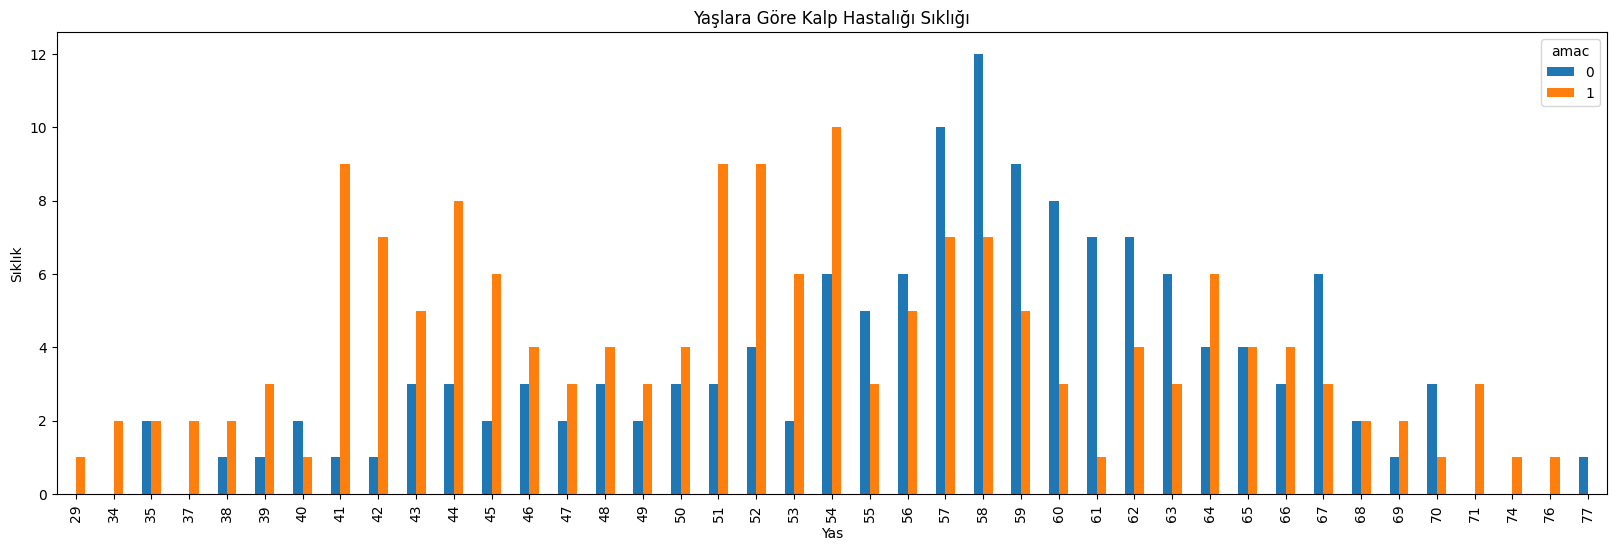

In [26]:
# Yaş parametresi ile kalp hastalığı sıklığını bulma

pd.crosstab(df.yas,df.amac).plot(kind="bar",figsize=(20,6))
plt.title('Yaşlara Göre Kalp Hastalığı Sıklığı')
plt.xlabel('Yas')
plt.ylabel('Sıklık')
plt.savefig('kalp_yas.png')
plt.show()

In [27]:
c = df["gogus_agrı_tipi"].value_counts()
labels = c.index
fig = px.bar(c, title = "Göğüs Ağrı Tipi", text = c)
fig.show()

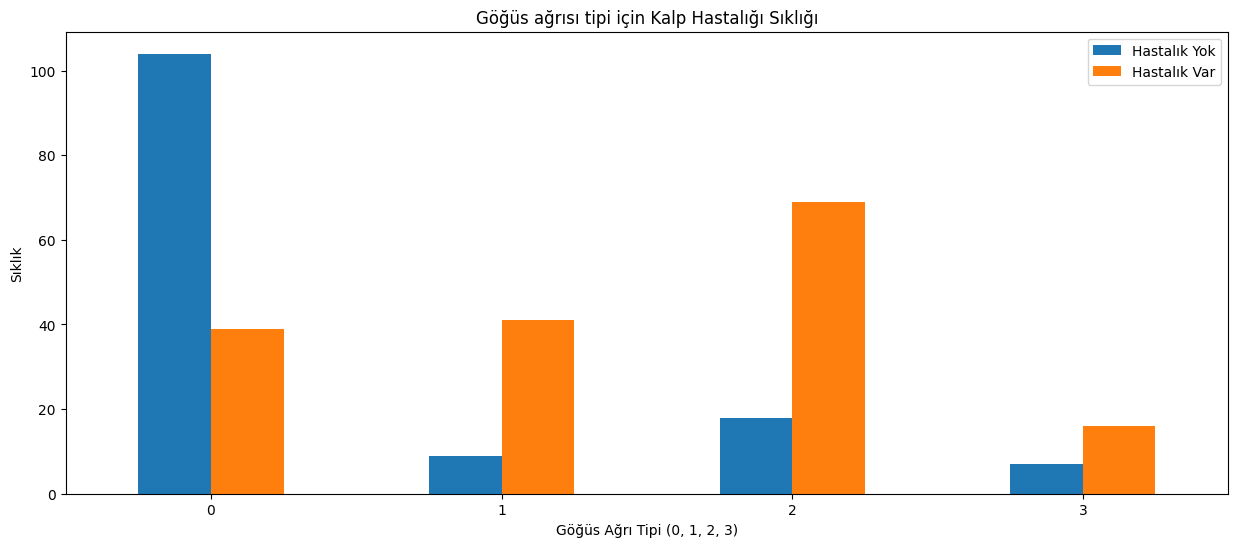

In [ ]:
pd.crosstab(df.gogus_agrı_tipi,df.amac).plot(kind="bar",figsize=(15,6))
plt.title('Göğüs ağrısı tipi için Kalp Hastalığı Sıklığı')
plt.xlabel('Göğüs Ağrı Tipi (0, 1, 2, 3)')
plt.xticks(rotation=0)
plt.legend(["Hastalık Yok", "Hastalık Var"])
plt.ylabel('Sıklık')
plt.show()

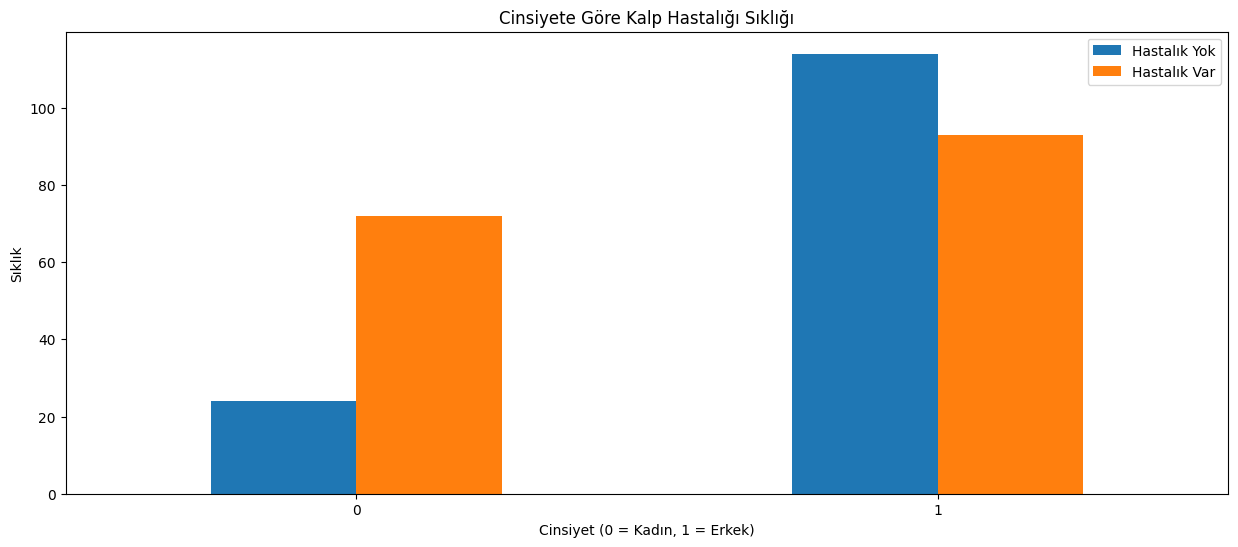

In [28]:
#  Kalp hastalığının cinsiyetle ilişkisi

pd.crosstab(df.cinsiyet,df.amac).plot(kind="bar",figsize=(15,6))
plt.title('Cinsiyete Göre Kalp Hastalığı Sıklığı')
plt.xlabel('Cinsiyet (0 = Kadın, 1 = Erkek)')
plt.xticks(rotation=0)
plt.legend(["Hastalık Yok", "Hastalık Var"])
plt.ylabel('Sıklık')
plt.show()

In [29]:
fig = px.scatter(df, x="yas", y="Ulasılan_maks_kalp_hızı", color = "amac")
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='MediumPurple')),
                  selector=dict(mode='markers'))
fig.show()

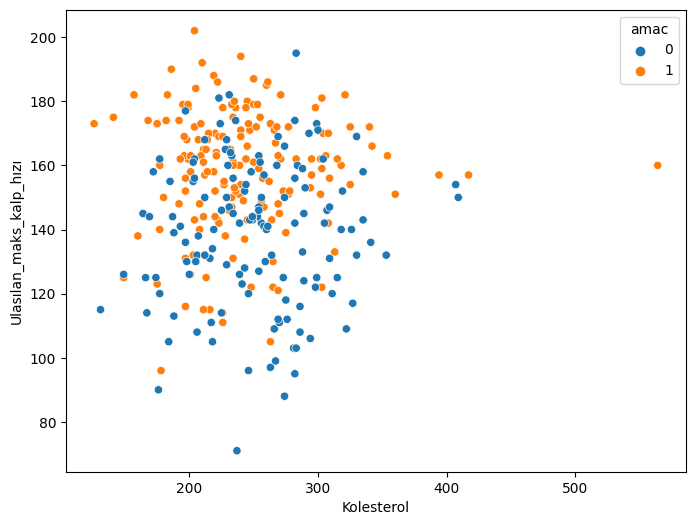

In [30]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Kolesterol',y='Ulasılan_maks_kalp_hızı',data=df,hue='amac')
plt.show()

In [ ]:
fig = px.bar(df, x = "talasemi", y = "amac")
fig.show()

In [31]:
X = df.drop("amac", axis=1)  # Özellikler
y = df["amac"]  # Hedef değişken

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
# SVM modelini oluşturun
svm_model = SVC(kernel='linear', C=1.0, random_state=0)

# Eğitim verilerini kullanarak modeli eğitin
svm_model.fit(X_train, y_train)


SVC(kernel='linear', random_state=0)

In [33]:
from sklearn.metrics import accuracy_score, classification_report

# Test verileri üzerinde tahmin yapın
y_pred = svm_model.predict(X_test)

# Modelin performansını değerlendirin
accuracy = accuracy_score(y_test, y_pred)
rapor = classification_report(y_test, y_pred)

print("Model Doğruluğu:", accuracy)
print("Sınıflandırma Raporu:\n", rapor)


Model Doğruluğu: 0.8688524590163934
Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [40]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest modelini oluşturun
rf_model = RandomForestClassifier(n_estimators=200, max_depth=15, random_state=0)  # Ağaç derinliğini artırın



# Eğitim verilerini kullanarak modeli eğitin
rf_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=15, n_estimators=200, random_state=0)

In [41]:
from sklearn.metrics import accuracy_score, classification_report

# Test verileri üzerinde tahmin yapın
y_pred = rf_model.predict(X_test)

# Modelin performansını değerlendirin
accuracy = accuracy_score(y_test, y_pred)
rapor = classification_report(y_test, y_pred)

print("Model Doğruluğu:", accuracy)
print("Sınıflandırma Raporu:\n", rapor)


Model Doğruluğu: 0.8524590163934426
Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

